In [2]:
# Question 4: Autoencoders for Dimensionality Reduction using Keras
# Description: Implement a simple autoencoder using Keras to reduce dimensionality.

2025-05-05 12:11:00.889978: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 12:11:01.091699: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 12:11:01.205489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746447061.277041   17187 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746447061.302329   17187 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746447061.446035   17187 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/50


2025-05-05 12:11:03.665646: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.5603 - val_loss: 0.7591
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5716 - val_loss: 0.7535
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4464 - val_loss: 0.7478
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4800 - val_loss: 0.7428
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3752 - val_loss: 0.7378
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4496 - val_loss: 0.7327
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5661 - val_loss: 0.7276
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4688 - val_loss: 0.7227
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4527 - val_loss: 0.7176
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4283 - val_loss: 0.7133
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3369 - val_loss: 0.7087
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3468 - val_loss: 0.7043
Epoch 13/50
8/8 ━━━━━━

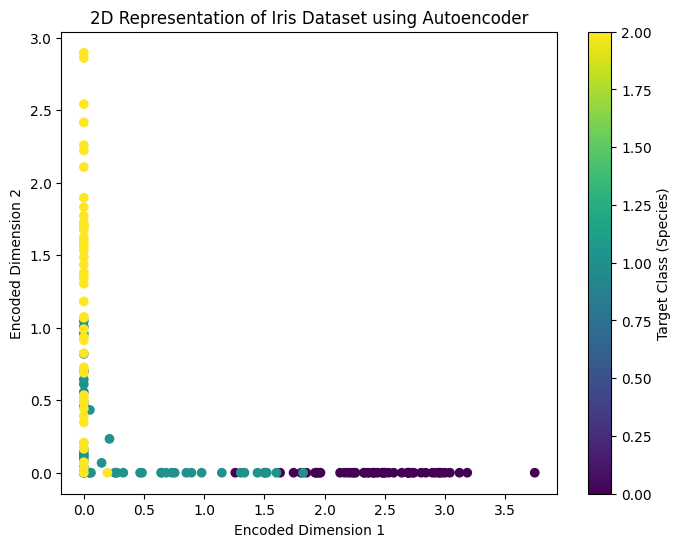

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# Step 1: Load and preprocess the dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels (species)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Build the Autoencoder model
input_dim = X_scaled.shape[1]  # Number of features (4 for Iris dataset)
encoding_dim = 2  # Reduced dimensionality to 2

# Define the encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_layer, decoded)

# Define the encoder model (to extract the reduced representation)
encoder = Model(input_layer, encoded)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Step 3: Train the model
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Step 4: Evaluate and visualize the reduced representation
X_encoded = encoder.predict(X_scaled)

# Visualize the reduced representation
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y, cmap='viridis')
plt.title("2D Representation of Iris Dataset using Autoencoder")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.colorbar(label='Target Class (Species)')
plt.show()
